In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from keras.optimizers import Adam
from deepjets.models import get_maxout, load_model
from deepjets.learning import optimizer_grid_search, prepare_datasets, test_model

Using Theano backend.


In [3]:
n_images = 1000
n_folds = 3
test_frac = 0.1
val_frac = 0.1
sig_file = 'images/w_shrink_1p2.h5'
bkd_file = 'images/qcd_shrink_1p2.h5'
dataset_name = 'datasets/shrink_1p2'
model_name = 'models/maxout_shrink_1p2'

In [4]:
h5_files = prepare_datasets(
    sig_file, bkd_file, dataset_name,
    n_sig=n_images, n_bkd=n_images, test_frac=test_frac, val_frac=val_frac,
    n_folds=n_folds, shuffle=True, shuffle_seed=1)

In [5]:
optimizer_grid_search(get_maxout, (25**2,), Adam, {'lr' : [0.001, 0.002]},
                      h5_files['train'], model_name=model_name, verbose=2, max_jobs=1)

Optimizer parameters = {'lr': 0.001}

Training on 1080 samples, validating on 120 samples.
Datasets from datasets/shrink_1p2_train_kf0.h5.
Epoch 21/100: epochs w/o increase = 10, AUC = 5.72294165325                    
Patience tolerance reached.
Training complete. Best AUC = 5.79107925547

Testing on 600 samples.
Dataset from datasets/shrink_1p2_train_kf0.h5.
Score    = 0.608583737214
AUC      = 10.5139868848
Accuracy = 410/600 = 0.683333333333

Training on 1080 samples, validating on 120 samples.
Datasets from datasets/shrink_1p2_train_kf1.h5.
Epoch 17/100: epochs w/o increase = 10, AUC = 4.58162393162                    
Patience tolerance reached.
Training complete. Best AUC = 15.2409090909

Testing on 600 samples.
Dataset from datasets/shrink_1p2_train_kf1.h5.
Score    = 0.650022788445
AUC      = 9.5622759283
Accuracy = 387/600 = 0.645

Training on 1080 samples, validating on 120 samples.
Datasets from datasets/shrink_1p2_train_kf2.h5.
Epoch 18/100: epochs w/o increase = 10, AUC =

[{'optimizer_kwargs': {'lr': 0.001},
  'results': {'AUCs': [10.513986884767395,
    9.5622759283034391,
    7.8684283935623611],
   'accuracies': [0.6833333333333333, 0.645, 0.7166666666666667],
   'scores': [0.60858373721440628, 0.65002278844515482, 0.56612042427062992]}},
 {'optimizer_kwargs': {'lr': 0.002},
  'results': {'AUCs': [10.221367337100842,
    9.6599608172979643,
    8.8032545607159989],
   'accuracies': [0.7366666666666667, 0.675, 0.66],
   'scores': [0.57660967310269673, 0.60750814437866207, 0.60395391941070553]}}]

Testing on 200 samples.
Dataset from datasets/shrink_1p2_test.h5.
Score    = 0.660318310261
AUC      = 7.06739691104
Accuracy = 115/200 = 0.575



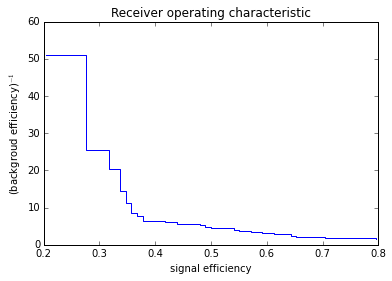

In [6]:
_ = test_model(load_model('models/maxout_shrink_1p2_kf1'), h5_files['test'])